# Clustering
Clustering, or cluster analysis, is the task of grouping observations
so that members of the same group, or cluster, are more similar to
each other by some metric than they are to members of other clusters.

##### Use Cases
* Social Networks - to identify communities and suggest missing connections
  between people
* Biology - to find groups of genes with similar expression patters
* Recommendation Systems - to identify products or media that might
  appeal to a user
* Marketing - to find segments of similar consumers

## K-Means
K-means is a popular algorithm for analysing clusters due to its
speed and scalability. It works by **Moving the centers of clusers**
to the mean position and then **re-assigning instances** to clusters
with the **closest centroids**.

_*K*_ is a hyperparameter that specifies the number of clusters
that should be created. K-means automatically assigns observations
to the clusters but cannot determine the appropriate number of
clusters. It must be a positive integer and is less than the number
of instance in the training set.

In *K-means*, parameters are the positions of clusters' centroids
and the observations that are assigned to each cluster. Optimal
values are found by minimizing a cost function.

_*Cost Function for K-Means*_:  
$J = \sum_{k=1}^K \sum_{i\ element of\ C_k} ||x_i - \mu_k||^2$

###### Cost Function
* Sums the distoritions of the clusters
* Cluster distorition, sum of squared distances between
  its centroid and corresponding instances
* Distorion is large for small compact clusters and vice versa
* Parameters that minimize the cost function are learned through:
  * Assigning observations to clusters
  * Moving the clusters
* Minimizing the cost function:
  1. Clusters' centroids are initialized by randomly selecting instances
  2. Assigns obersvations to closest cluster
  3. Moving centroids to their assigned observation' mean location
  
##### Selecting k Using Elbow Method
* Predits the optimal number of clusters
* Elbow method plots value of cost function:
  * Produced by different values of k
* When k increases:
  * Average distortion decreases
  * Each cluster will have fewer consituent instances
  * Instances will be closer to their respective centroids
  * Improvements to the average dispersion declines
* Elbow - 
  * The value of k at which the improvement to the dispersion
    declines the most

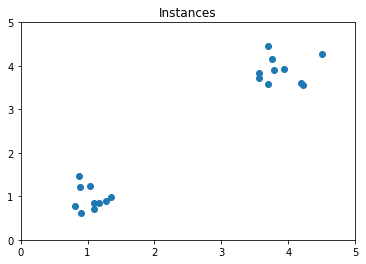

In [1]:
# Selecting k with the elbow method
# First: Make some data
import numpy as np
import matplotlib.pyplot as plt

c1x = np.random.uniform(0.5, 1.5, (1, 10))
c1y = np.random.uniform(0.5, 1.5, (1, 10))
c2x = np.random.uniform(3.5, 4.5, (1, 10))
c2y = np.random.uniform(3.5, 4.5, (1, 10))
x = np.hstack((c1x, c2x))
y = np.hstack((c1y, c2y))
plt.scatter(x, y)
plt.xticks(np.arange(0, 6, 1))
plt.yticks(np.arange(0, 6, 1))
plt.title('Instances')
plt.show()

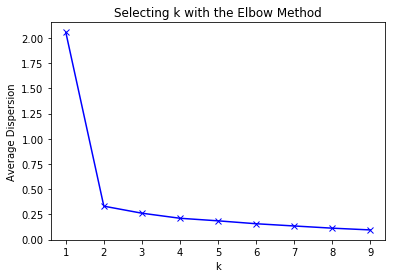

In [2]:
# Calculate and plot the mean dispersion of the clusters for
# each value of k from 1 to 10
from sklearn.cluster import KMeans 
from scipy.spatial.distance import cdist 

# Same data as visualised above
c1x = np.random.uniform(0.5, 1.5, (1, 10)) 
c1y = np.random.uniform(0.5, 1.5, (1, 10)) 
c2x = np.random.uniform(3.5, 4.5, (1, 10)) 
c2y = np.random.uniform(3.5, 4.5, (1, 10)) 
x = np.hstack((c1x, c2x)) 
y = np.hstack((c1y, c2y)) 
X = np.vstack((x, y)).T 

# Calculate mean dispersion and plot the graph
K = range(1, 10) 
meanDispersions = [] 
for k in K: 
    kmeans = KMeans(n_clusters=k) 
    kmeans.fit(X) 
    meanDispersions.append(sum(np.min(cdist(X,kmeans.cluster_centers_,'euclidean'),axis=1))/X.shape[0])
plt.plot(K, meanDispersions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average Dispersion') 
plt.title('Selecting k with the Elbow Method') 
plt.show()

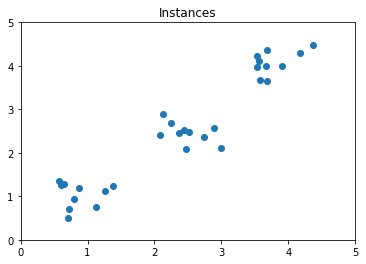

In [3]:
# Now creating data with 3 clusters
import numpy as np
import matplotlib.pyplot as plt

c1x = np.random.uniform(0.5, 1.5, (1, 10))
c1y = np.random.uniform(0.5, 1.5, (1, 10))
c2x = np.random.uniform(3.5, 4.5, (1, 10))
c2y = np.random.uniform(3.5, 4.5, (1, 10))
c3x = np.random.uniform(2.0, 3.0, (1, 10))
c3y = np.random.uniform(2.0, 3.0, (1, 10))
x = np.hstack((c1x, c2x, c3x))
y = np.hstack((c1y, c2y, c3y))
plt.scatter(x, y)
plt.xticks(np.arange(0, 6, 1))
plt.yticks(np.arange(0, 6, 1))
plt.title('Instances')
plt.show()

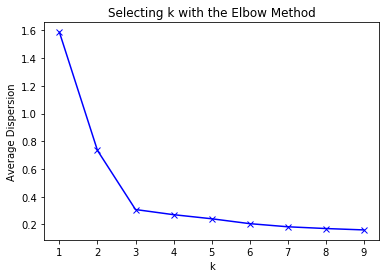

In [4]:
# Calculating the Elbow plot with 3 clusters
import numpy as np 
from sklearn.cluster import KMeans 
from scipy.spatial.distance import cdist 
import matplotlib.pyplot as plt 

# Same data as above
c1x = np.random.uniform(0.5, 1.5, (1, 10)) 
c1y = np.random.uniform(0.5, 1.5, (1, 10)) 
c2x = np.random.uniform(3.5, 4.5, (1, 10)) 
c2y = np.random.uniform(3.5, 4.5, (1, 10)) 
c3x = np.random.uniform(2.0, 3.0, (1, 10))
c3y = np.random.uniform(2.0, 3.0, (1, 10))
x = np.hstack((c1x, c2x, c3x))
y = np.hstack((c1y, c2y, c3y))
X = np.vstack((x, y)).T 

# Calulate mean dispersion and plot
# Notice difference in the elbow graph
# k = 3 is now effective
K = range(1, 10) 
meanDispersions = [] 
for k in K: 
    kmeans = KMeans(n_clusters=k) 
    kmeans.fit(X) 
    meanDispersions.append(sum(np.min(cdist(X,kmeans.cluster_centers_,'euclidean'),axis=1))/X.shape[0])
plt.plot(K, meanDispersions, 'bx-') 
plt.xlabel('k') 
plt.ylabel('Average Dispersion') 
plt.title('Selecting k with the Elbow Method') 
plt.show()

# Evaluating Clusters
### K-means Performance Measure - Silhoutte Coefficient
* K-means is an unsupervised learning algorithm
  * No labels or ground truth
* Intrinsic measures can be used
* Silhoutte Coefficient - measure of compactness and sparation of clusters
  * Increases with quality of cluster
  * Large for small compact clusters and vice versa
  * Calculated as the mean of the individual samples' scores
  * $s = \frac{ba}{max(a,b)}$

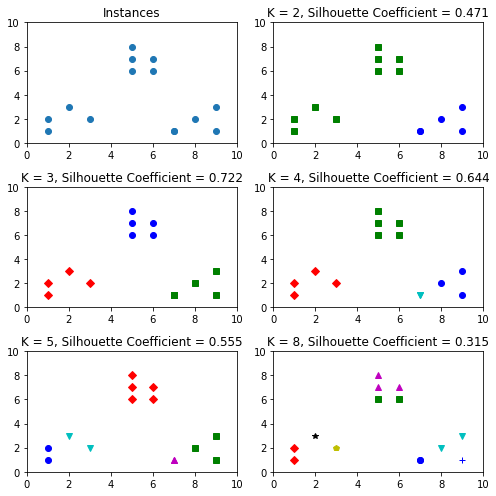

In [5]:
# Runs k-means 4 times to create 2,3,4, and 8 clusters from
# toy dataset and calculates a silhoutte coefficient for
# each run.
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7,7))
plt.subplot(3, 2, 1)
x1 = np.array([1, 2, 3, 1, 5, 6, 5, 5, 6, 7, 8, 9, 7, 9])
x2 = np.array([1, 3, 2, 2, 8, 6, 7, 6, 7, 1, 2, 1, 1, 3])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Instances')
plt.scatter(x1, x2)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ['o', 's', 'D', 'v', '^', 'p', '*', '+']
tests = [2, 3, 4, 5, 8]
subplot_counter = 1
for t in tests:
    subplot_counter += 1
    plt.subplot(3, 2, subplot_counter)
    kmeans_model = KMeans(n_clusters=t).fit(X)
    for i, l in enumerate(kmeans_model.labels_):
        plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l], ls='None')   
    plt.xlim([0, 10])
    plt.ylim([0, 10])
    plt.xticks(np.arange(0, 12, 2))
    plt.yticks(np.arange(0, 12, 2))
    plt.title('K = %s, Silhouette Coefficient = %.03f' % (
        t, metrics.silhouette_score(X, kmeans_model.labels_, metric='euclidean')))
    plt.tight_layout()
plt.show()

# Image Quantisation
* Lossy compression method
* Replaces a range of similar colours with a single colour
* Reduces the size of the image

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from PIL import Image

# First we read and flatten the image. 
original_img = np.array(Image.open('tree.jpg'), dtype=np.float64) / 255
original_dimensions = tuple(original_img.shape)
width, height, depth = tuple(original_img.shape)
image_flattened = np.reshape(original_img, (width * height, depth))

In [8]:
# Use K-Means to create 64 cluster from a sample of 1000
# randomly selected colours. Each cluster will be a colour
# in the created palette
image_array_sample = shuffle(image_flattened, random_state=0)[:1000]
estimator = KMeans(n_clusters=64, random_state=0)
estimator.fit(image_array_sample)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=64, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [9]:
# Predict the cluster assignment for each of the pixels
# in the original image
cluster_assignments = estimator.predict(image_flattened)

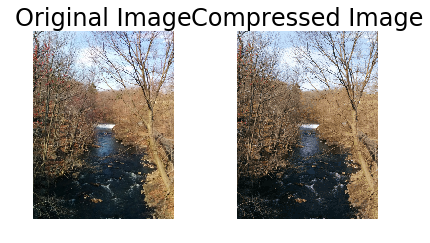

In [10]:
# Create the compressed image from the compressed palette
# and cluster assignments

# First get cluster centers then create the compressed image
compressed_palette = estimator.cluster_centers_
compressed_img = np.zeros((width, height, compressed_palette.shape[1]))
label_idx = 0
for i in range(width):
    for j in range(height):
        compressed_img[i][j] = compressed_palette[cluster_assignments[label_idx]]
        label_idx += 1

plt.subplot(121)
plt.title('Original Image', fontsize=24)
plt.imshow(original_img)
plt.axis('off')
plt.subplot(122)
plt.title('Compressed Image', fontsize=24)
plt.imshow(compressed_img)
plt.axis('off')
plt.tight_layout()
plt.show()

# Clustering to learn features

In [11]:
import numpy as np
import mahotas as mh
from mahotas.features import surf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.cluster import MiniBatchKMeans
import glob
import os

ModuleNotFoundError: No module named 'mahotas'